In [42]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
#loading data
df=pd.read_csv('payment_fraud.csv')

In [44]:
df.head()

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,Category,isWeekend,label
0,29,1,4.745402,paypal,28.204861,shopping,0.0,0
1,725,1,4.742303,storecredit,0.000000,electronics,0.0,0
2,845,1,4.921318,creditcard,0.000000,food,1.0,0
3,503,1,4.886641,creditcard,0.000000,electronics,1.0,0
4,2000,1,5.040929,creditcard,0.000000,shopping,0.0,0


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39221 entries, 0 to 39220
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   accountAgeDays        39221 non-null  int64  
 1   numItems              39221 non-null  int64  
 2   localTime             39221 non-null  float64
 3   paymentMethod         39221 non-null  object 
 4   paymentMethodAgeDays  39221 non-null  float64
 5   Category              39126 non-null  object 
 6   isWeekend             38661 non-null  float64
 7   label                 39221 non-null  int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 2.4+ MB


In [46]:
df['paymentMethod'].unique()
df['Category'].unique()

array(['shopping', 'electronics', 'food', nan], dtype=object)

In [47]:
#handling null value
df.isnull().sum()


accountAgeDays            0
numItems                  0
localTime                 0
paymentMethod             0
paymentMethodAgeDays      0
Category                 95
isWeekend               560
label                     0
dtype: int64

In [48]:
'''#df.dropna(inplace=True)
df = df.dropna()
df = df.drop_duplicates()''' # removal will not help as potential fraud data label=1 get lost significantly
df.fillna({'Category': df['Category'].mode()[0]}, inplace=True)
df.fillna({'isWeekend': df['isWeekend'].mode()[0]}, inplace=True)

In [49]:
df.head()

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,Category,isWeekend,label
0,29,1,4.745402,paypal,28.204861,shopping,0.0,0
1,725,1,4.742303,storecredit,0.000000,electronics,0.0,0
2,845,1,4.921318,creditcard,0.000000,food,1.0,0
3,503,1,4.886641,creditcard,0.000000,electronics,1.0,0
4,2000,1,5.040929,creditcard,0.000000,shopping,0.0,0


In [50]:
df.isnull().sum()

accountAgeDays          0
numItems                0
localTime               0
paymentMethod           0
paymentMethodAgeDays    0
Category                0
isWeekend               0
label                   0
dtype: int64

In [51]:
#since category and paymentmethod is object type and contain string we use one hot encoding to convert this data 
from sklearn.preprocessing import OneHotEncoder
encoder1=OneHotEncoder()
encoder2=OneHotEncoder()
encoded1=encoder1.fit_transform(df[['Category']]).toarray()
encoded2=encoder2.fit_transform(df[['paymentMethod']]).toarray()
encoded_df1 = pd.DataFrame(encoded1, columns=encoder1.get_feature_names_out(), index=df.index)
encoded_df2 = pd.DataFrame(encoded2, columns=encoder2.get_feature_names_out(), index=df.index)
df = pd.concat([df.drop('Category', axis=1), encoded_df1], axis=1)
df = pd.concat([df.drop('paymentMethod', axis=1), encoded_df2], axis=1)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39221 entries, 0 to 39220
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   accountAgeDays             39221 non-null  int64  
 1   numItems                   39221 non-null  int64  
 2   localTime                  39221 non-null  float64
 3   paymentMethodAgeDays       39221 non-null  float64
 4   isWeekend                  39221 non-null  float64
 5   label                      39221 non-null  int64  
 6   Category_electronics       39221 non-null  float64
 7   Category_food              39221 non-null  float64
 8   Category_shopping          39221 non-null  float64
 9   paymentMethod_creditcard   39221 non-null  float64
 10  paymentMethod_paypal       39221 non-null  float64
 11  paymentMethod_storecredit  39221 non-null  float64
dtypes: float64(9), int64(3)
memory usage: 3.6 MB


In [53]:
#checking for data imbalance 
print(df['label'].value_counts())

label
0    38661
1      560
Name: count, dtype: int64


In [54]:
# observation : data is imbalance so , using upsampling for making data balance 

'''from imblearn.over_sampling import SMOTE
# it is use to create new data point for up sampling
oversample=SMOTE()
X,y=oversample.fit_resample(df.drop("label",axis=1),df['label'])'''
X=df.drop("label",axis=1)
y=df['label']
print(X.shape)
print(len(y))


(39221, 11)
39221


Text(0.5, 1.0, 'Correlation matrix')

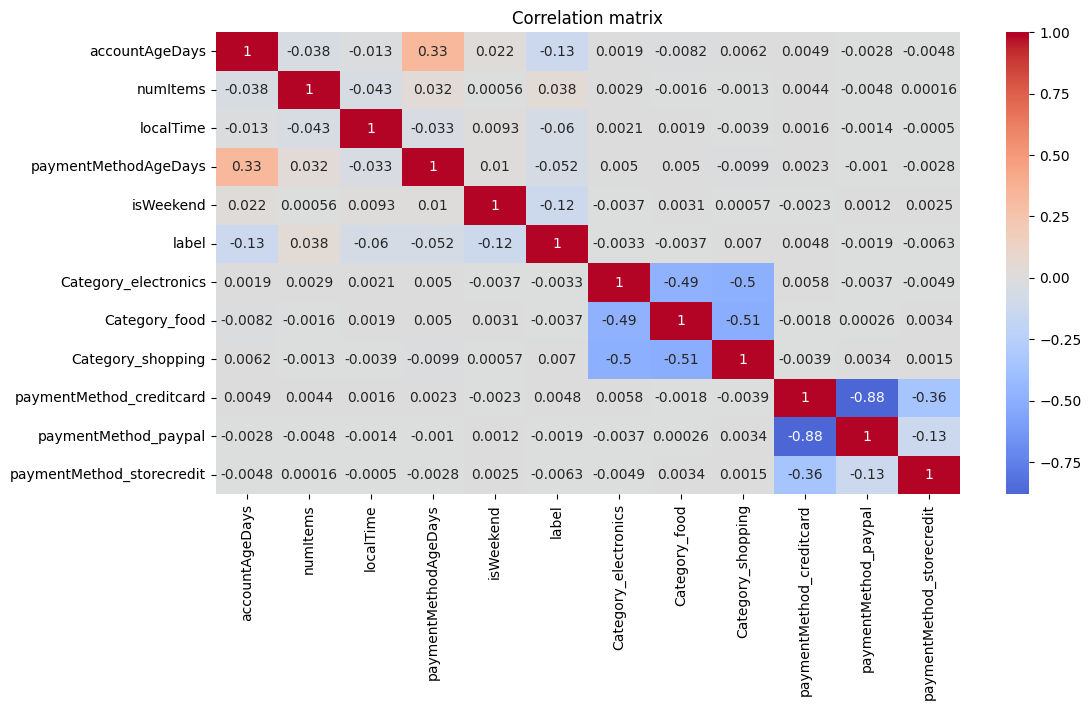

In [55]:
#correlation matrix 
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),
           annot=True,
           center=0,
           cmap='coolwarm')
plt.title("Correlation matrix")

In [56]:
#standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [57]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)

In [58]:
#model training
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,recall_score,f1_score,roc_auc_score,precision_score

In [59]:
models={
    'logistic regression':LogisticRegression(),
    'SVc':SVC(),
    "knn":KNeighborsClassifier(),
    "naiveB":GaussianNB(),
    'randomforest':RandomForestClassifier(),
    'decision tree':DecisionTreeClassifier(),
    "adaa":AdaBoostClassifier(),
    "GradientBoostingClassifier":GradientBoostingClassifier()
}
for i in range (len(list(models))):
    #model training
    model=list(models.values())[i]
    model.fit(X_train,y_train)
    # model pred
    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)

    #prefomance fot training
    model_train_acc=accuracy_score(y_train,y_train_pred)
    model_train_f1=f1_score(y_train,y_train_pred,average='weighted')
    model_train_pre=precision_score(y_train,y_train_pred)
    model_train_recall=recall_score(y_train,y_train_pred)
    model_train_roc=roc_auc_score(y_train,y_train_pred)

    #prefomance fot training
    model_test_acc=accuracy_score(y_test,y_test_pred)
    model_test_f1=f1_score(y_test,y_test_pred,average='weighted')
    model_test_pre=precision_score(y_test,y_test_pred)
    model_test_recall=recall_score(y_test,y_test_pred)
    model_test_roc=roc_auc_score(y_test,y_test_pred)

    #print training score
    print("model :",list(models.keys())[i])
    print("preformance on training set")
    print("accuracy :{:.4f}".format(model_train_acc))
    print("f1 Score:{:.4f}".format(model_train_f1))
    print("precision score :{:.4f}".format(model_train_pre))
    print("Recall Score :{:.4f}".format(model_train_recall))
    print("ROC Score{:.4f}".format(model_train_roc))
    print('--------------------------------------------------------------------')
    #print testing score
    print("preformance on testing set")
    print("accuracy :{:.4f}".format(model_test_acc))
    print("f1 Score:{:.4f}".format(model_test_f1))
    print("precision score :{:.4f}".format(model_test_pre))
    print("Recall Score :{:.4f}".format(model_test_recall))
    print("ROC Score{:.4f}".format(model_test_roc))

    print("===========================================================================")
    print("\n")





model : logistic regression
preformance on training set
accuracy :0.9858
f1 Score:0.9792
precision score :0.6364
Recall Score :0.0179
ROC Score0.5089
--------------------------------------------------------------------
preformance on testing set
accuracy :0.9856
f1 Score:0.9789
precision score :0.4000
Recall Score :0.0119
ROC Score0.5058




c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


model : SVc
preformance on training set
accuracy :0.9857
f1 Score:0.9786
precision score :0.0000
Recall Score :0.0000
ROC Score0.5000
--------------------------------------------------------------------
preformance on testing set
accuracy :0.9857
f1 Score:0.9786
precision score :0.0000
Recall Score :0.0000
ROC Score0.5000


model : knn
preformance on training set
accuracy :0.9932
f1 Score:0.9927
precision score :0.8423
Recall Score :0.6403
ROC Score0.8193
--------------------------------------------------------------------
preformance on testing set
accuracy :0.9893
f1 Score:0.9885
precision score :0.6694
Recall Score :0.4940
ROC Score0.7453


model : naiveB
preformance on training set
accuracy :0.9999
f1 Score:0.9999
precision score :1.0000
Recall Score :0.9923
ROC Score0.9962
--------------------------------------------------------------------
preformance on testing set
accuracy :0.9998
f1 Score:0.9998
precision score :1.0000
Recall Score :0.9881
ROC Score0.9940


model : randomfores

In [62]:
#hyper perameter tuneing
from sklearn.model_selection import RandomizedSearchCV
rf_params={"max_depth":[5,10,15,None,8],
           "max_features": ['sqrt', 'log2', 5, 7, 8],
           "min_samples_split":[2,8,15,20],
           "n_estimators":[100,200,500,1000]}
adaboost_param={
    "n_estimators":[50,60,70,80,90],
    "algorithm":['SAMME','SAMME.R']
}
log_params={'penalty':['l1','l2','elasticney'],
            "C":[100,10,0.1,0.01,1],
            'solver':['newton-cg','saga','sag','liblinear','lbfgs']}
dt_params=params={'criterion':['gini', 'entropy', 'log_loss'],
        'splitter':['best','random'],
        'max_depth':[1,2,3,4,5],
       'max_features':['sqrt','log2','auto'],    
}
sv_param= {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.01, 0.001],
    'degree': [2, 3, 4],  # Only used if kernel='poly'
    'coef0': [0.0, 0.5, 1.0],  # For 'poly' and 'sigmoid'
    'class_weight': [None, 'balanced']
}

knn_param = {
    'n_neighbors': list(range(3, 16, 2)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
grad_params={'loss':['log_loss', 'exponential','deviance'],
             'criterion':['friedman_mse', 'squared_error','mse'],
             'min_samples_split':[2,8,15,20],
             'n_estimators':[100,200,500,1000],
             'max_depth':[5,8,15,None]

             }


In [ ]:
#hyper parameter tuning
from sklearn.model_selection import GridSearchCV,StratifiedKFold
randomcvmodels=[("RF",RandomForestClassifier(),rf_params),("LogisticRegression",LogisticRegression(),log_params),
                ("AdaBoostClassifier",AdaBoostClassifier(),adaboost_param),
               ("DecisionTreeClassifier",DecisionTreeClassifier(),dt_params),
               ("SVC",SVC(),sv_param),
               ("KNN",KNeighborsClassifier(),knn_param),
               ("Grad",GradientBoostingClassifier(),grad_params)]

model_param={}
for name,model,param in randomcvmodels:
    random=RandomizedSearchCV(
        estimator=model,
        param_distributions=param,
        n_iter=100,
        verbose=2,
        cv=3
    )
    random.fit(X_train,y_train)
    model_param[name]=random.best_params_

for modelname in model_param:
    print(f"best parameter for {modelname}  ::")
    print(model_param[modelname])




Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END max_depth=5, max_features=log2, min_samples_split=2, n_estimators=500; total time=   1.8s
[CV] END max_depth=5, max_features=log2, min_samples_split=2, n_estimators=500; total time=   1.6s
[CV] END max_depth=5, max_features=log2, min_samples_split=2, n_estimators=500; total time=   1.6s
[CV] END max_depth=None, max_features=5, min_samples_split=2, n_estimators=500; total time=   1.7s
[CV] END max_depth=None, max_features=5, min_samples_split=2, n_estimators=500; total time=   1.8s
[CV] END max_depth=None, max_features=5, min_samples_split=2, n_estimators=500; total time=   1.9s
[CV] END max_depth=8, max_features=5, min_samples_split=20, n_estimators=1000; total time=   3.8s
[CV] END max_depth=8, max_features=5, min_samples_split=20, n_estimators=1000; total time=   3.7s
[CV] END max_depth=8, max_features=5, min_samples_split=20, n_estimators=1000; total time=   3.4s
[CV] END max_depth=10, max_features=7, min_sample

c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 75 is smaller than n_iter=100. Running 75 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 75 candidates, totalling 225 fits
[CV] END ................C=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ................C=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ................C=100, penalty=l1, solver=newton-cg; total time=   0.0s


c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=100, penalty=l1, solver=saga; total time=   0.2s


c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=100, penalty=l1, solver=saga; total time=   0.2s


c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=100, penalty=l1, solver=saga; total time=   0.2s
[CV] END ......................C=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END ......................C=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END ......................C=100, penalty=l1, solver=sag; total time=   0.0s


c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END ................C=100, penalty=l1, solver=liblinear; total time=  15.0s


c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END ................C=100, penalty=l1, solver=liblinear; total time=  13.0s


c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END ................C=100, penalty=l1, solver=liblinear; total time=  13.8s
[CV] END ....................C=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ....................C=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ....................C=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ................C=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ................C=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ................C=100, penalty=l2, solver=newton-cg; total time=   0.0s


c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=100, penalty=l2, solver=saga; total time=   0.1s
[CV] END .....................C=100, penalty=l2, solver=saga; total time=   0.1s


c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=100, penalty=l2, solver=saga; total time=   0.1s
[CV] END ......................C=100, penalty=l2, solver=sag; total time=   0.1s


c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................C=100, penalty=l2, solver=sag; total time=   0.1s
[CV] END ......................C=100, penalty=l2, solver=sag; total time=   0.1s
[CV] END ................C=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ................C=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ................C=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ....................C=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....................C=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....................C=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ........C=100, penalty=elasticney, solver=newton-cg; total time=   0.0s
[CV] END ........C=100, penalty=elasticney, solver=newton-cg; total time=   0.0s
[CV] END ........C=100, penalty=elasticney, solver=newton-cg; total time=   0.0s
[CV] END .............C=100, penalty=elasticney, solver=saga; total time=   0.0s
[CV] END .............C=100,

c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................C=10, penalty=l1, solver=saga; total time=   0.2s


c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................C=10, penalty=l1, solver=saga; total time=   0.2s


c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................C=10, penalty=l1, solver=saga; total time=   0.2s
[CV] END .......................C=10, penalty=l1, solver=sag; total time=   0.0s
[CV] END .......................C=10, penalty=l1, solver=sag; total time=   0.0s
[CV] END .......................C=10, penalty=l1, solver=sag; total time=   0.0s


c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END .................C=10, penalty=l1, solver=liblinear; total time=   9.5s


c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END .................C=10, penalty=l1, solver=liblinear; total time=   9.7s


c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END .................C=10, penalty=l1, solver=liblinear; total time=   8.5s
[CV] END .....................C=10, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .....................C=10, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .....................C=10, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .................C=10, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .................C=10, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .................C=10, penalty=l2, solver=newton-cg; total time=   0.0s


c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................C=10, penalty=l2, solver=saga; total time=   0.1s
[CV] END ......................C=10, penalty=l2, solver=saga; total time=   0.1s


c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................C=10, penalty=l2, solver=saga; total time=   0.1s
[CV] END .......................C=10, penalty=l2, solver=sag; total time=   0.1s


c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......................C=10, penalty=l2, solver=sag; total time=   0.1s


c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......................C=10, penalty=l2, solver=sag; total time=   0.2s
[CV] END .................C=10, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .................C=10, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .................C=10, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .....................C=10, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .....................C=10, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .....................C=10, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .........C=10, penalty=elasticney, solver=newton-cg; total time=   0.0s
[CV] END .........C=10, penalty=elasticney, solver=newton-cg; total time=   0.0s
[CV] END .........C=10, penalty=elasticney, solver=newton-cg; total time=   0.0s
[CV] END ..............C=10, penalty=elasticney, solver=saga; total time=   0.0s
[CV] END ..............C=10, penalty=elasticney, solver=saga; total time=   0.0s
[CV] END ..............C=10,

c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=0.1, penalty=l1, solver=saga; total time=   0.2s


c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=0.1, penalty=l1, solver=saga; total time=   0.2s


c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=0.1, penalty=l1, solver=saga; total time=   0.2s
[CV] END ......................C=0.1, penalty=l1, solver=sag; total time=   0.0s
[CV] END ......................C=0.1, penalty=l1, solver=sag; total time=   0.0s
[CV] END ......................C=0.1, penalty=l1, solver=sag; total time=   0.0s
[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ....................C=0.1, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ....................C=0.1, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ....................C=0.1, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ................C=0.1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ................C=0.1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ................C=0

c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=0.1, penalty=l2, solver=saga; total time=   0.1s


c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=0.1, penalty=l2, solver=saga; total time=   0.1s


c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=0.1, penalty=l2, solver=saga; total time=   0.1s


c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................C=0.1, penalty=l2, solver=sag; total time=   0.1s
[CV] END ......................C=0.1, penalty=l2, solver=sag; total time=   0.0s


c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................C=0.1, penalty=l2, solver=sag; total time=   0.1s
[CV] END ................C=0.1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ................C=0.1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ................C=0.1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ....................C=0.1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....................C=0.1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....................C=0.1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ........C=0.1, penalty=elasticney, solver=newton-cg; total time=   0.0s
[CV] END ........C=0.1, penalty=elasticney, solver=newton-cg; total time=   0.0s
[CV] END ........C=0.1, penalty=elasticney, solver=newton-cg; total time=   0.0s
[CV] END .............C=0.1, penalty=elasticney, solver=saga; total time=   0.0s
[CV] END .............C=0.1, penalty=elasticney, solver=saga; total time=   0.0s
[CV] END .............C=0.1,

c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ....................C=0.01, penalty=l1, solver=saga; total time=   0.1s
[CV] END ....................C=0.01, penalty=l1, solver=saga; total time=   0.0s


c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ....................C=0.01, penalty=l1, solver=saga; total time=   0.1s
[CV] END .....................C=0.01, penalty=l1, solver=sag; total time=   0.0s
[CV] END .....................C=0.01, penalty=l1, solver=sag; total time=   0.0s
[CV] END .....................C=0.01, penalty=l1, solver=sag; total time=   0.0s
[CV] END ...............C=0.01, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...............C=0.01, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...............C=0.01, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...................C=0.01, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ...................C=0.01, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ...................C=0.01, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ...............C=0.01, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...............C=0.01, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...............C=0.

c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......................C=1, penalty=l1, solver=saga; total time=   0.2s


c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......................C=1, penalty=l1, solver=saga; total time=   0.2s


c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......................C=1, penalty=l1, solver=saga; total time=   0.2s
[CV] END ........................C=1, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........................C=1, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........................C=1, penalty=l1, solver=sag; total time=   0.0s


c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END ..................C=1, penalty=l1, solver=liblinear; total time=   5.0s


c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END ..................C=1, penalty=l1, solver=liblinear; total time=   3.5s


c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END ..................C=1, penalty=l1, solver=liblinear; total time=   5.6s
[CV] END ......................C=1, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......................C=1, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......................C=1, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ..................C=1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..................C=1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..................C=1, penalty=l2, solver=newton-cg; total time=   0.0s


c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......................C=1, penalty=l2, solver=saga; total time=   0.1s


c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......................C=1, penalty=l2, solver=saga; total time=   0.1s


c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......................C=1, penalty=l2, solver=saga; total time=   0.1s
[CV] END ........................C=1, penalty=l2, solver=sag; total time=   0.1s


c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........................C=1, penalty=l2, solver=sag; total time=   0.1s
[CV] END ........................C=1, penalty=l2, solver=sag; total time=   0.1s
[CV] END ..................C=1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..................C=1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..................C=1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ......................C=1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......................C=1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......................C=1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..........C=1, penalty=elasticney, solver=newton-cg; total time=   0.0s
[CV] END ..........C=1, penalty=elasticney, solver=newton-cg; total time=   0.0s
[CV] END ..........C=1, penalty=elasticney, solver=newton-cg; total time=   0.0s
[CV] END ...............C=1, penalty=elasticney, solver=saga; total time=   0.0s
[CV] END ...............C=1,

c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
120 fits failed out of a total of 225.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\DELL\AppData\

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END ...................algorithm=SAMME, n_estimators=50; total time=   0.0s
[CV] END ...................algorithm=SAMME, n_estimators=50; total time=   0.0s
[CV] END ...................algorithm=SAMME, n_estimators=50; total time=   0.0s
[CV] END ...................algorithm=SAMME, n_estimators=60; total time=   0.0s
[CV] END ...................algorithm=SAMME, n_estimators=60; total time=   0.0s
[CV] END ...................algorithm=SAMME, n_estimators=60; total time=   0.0s
[CV] END ...................algorithm=SAMME, n_estimators=70; total time=   0.0s
[CV] END ...................algorithm=SAMME, n_estimators=70; total time=   0.0s
[CV] END ...................algorithm=SAMME, n_estimators=70; total time=   0.0s
[CV] END ...................algorithm=SAMME, n_estimators=80; total time=   0.0s
[CV] END ...................algorithm=SAMME, n_estimators=80; total time=   0.0s
[CV] END ...................algorithm=SAMME, n_e

c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
90 fits failed out of a total of 270.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py", line 1358, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "c:\User

[CV] END C=10, class_weight=None, coef0=0.5, degree=4, gamma=scale, kernel=linear; total time=   0.4s
[CV] END C=10, class_weight=None, coef0=0.5, degree=4, gamma=scale, kernel=linear; total time=   0.5s
[CV] END C=10, class_weight=None, coef0=0.5, degree=4, gamma=scale, kernel=linear; total time=   0.4s
[CV] END C=100, class_weight=balanced, coef0=1.0, degree=3, gamma=auto, kernel=poly; total time=   3.1s
[CV] END C=100, class_weight=balanced, coef0=1.0, degree=3, gamma=auto, kernel=poly; total time=   3.5s
[CV] END C=100, class_weight=balanced, coef0=1.0, degree=3, gamma=auto, kernel=poly; total time=   2.3s
[CV] END C=100, class_weight=balanced, coef0=0.5, degree=4, gamma=0.001, kernel=poly; total time=   1.6s
